# Chicago Crime Analysis
### Final Deliverable
### By Sai Vinay Pabbisetty
## Data source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

In [1]:
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import plotly.express as px
import plotly.graph_objects as go
import os

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [2]:
df = pd.read_csv("C://Users//saivi//Desktop//606 Capstone//ChicagoCrimes//Dataset//Crimes_-_2001_to_present.csv",index_col='Date',parse_dates=True)
df.head()

C:\Users\saivi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2017-10-08 03:00:00,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-03-28 14:00:00,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-09-09 20:17:00,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-08-26 10:00:00,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [3]:
df.head(5)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2017-10-08 03:00:00,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-03-28 14:00:00,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-09-09 20:17:00,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-08-26 10:00:00,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [4]:
print(df.shape)

(7061128, 21)


### Handling Nulls & Missing values

In [5]:
df.isna().sum()

ID                           0
Case Number                  4
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6177
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614830
Community Area          613496
FBI Code                     0
X Coordinate             67616
Y Coordinate             67616
Year                         0
Updated On                   0
Latitude                 67616
Longitude                67616
Location                 67616
dtype: int64

In [6]:
df = df.dropna(subset=['Latitude', 'Longitude', 'Location','X Coordinate','Y Coordinate'])

df.isna().sum()

ID                           0
Case Number                  3
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      4075
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605575
Community Area          604292
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

In [7]:
df = df.dropna() 
df.isna().sum()

ID                      0
Case Number             0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

## EDA :

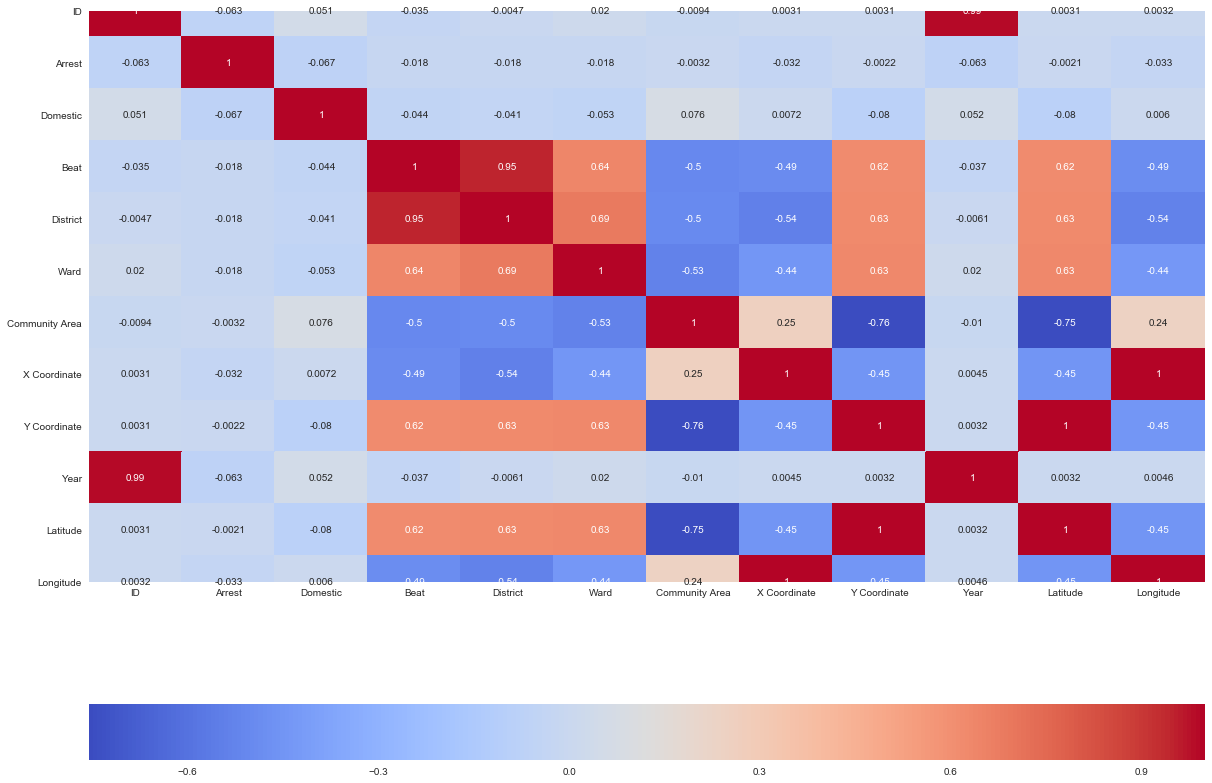

In [8]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})


## Which crimes are most frequently committed?

In [9]:
chcgo_crime_count = pd.DataFrame(df[['Primary Type']].groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [10]:
chcgo_crime_count.shape

(34, 2)

In [11]:
chcgo_crime_count.head()

,Primary Type,counts
0,THEFT,1354882
1,BATTERY,1168334
2,CRIMINAL DAMAGE,728526
3,NARCOTICS,652170
4,ASSAULT,401680


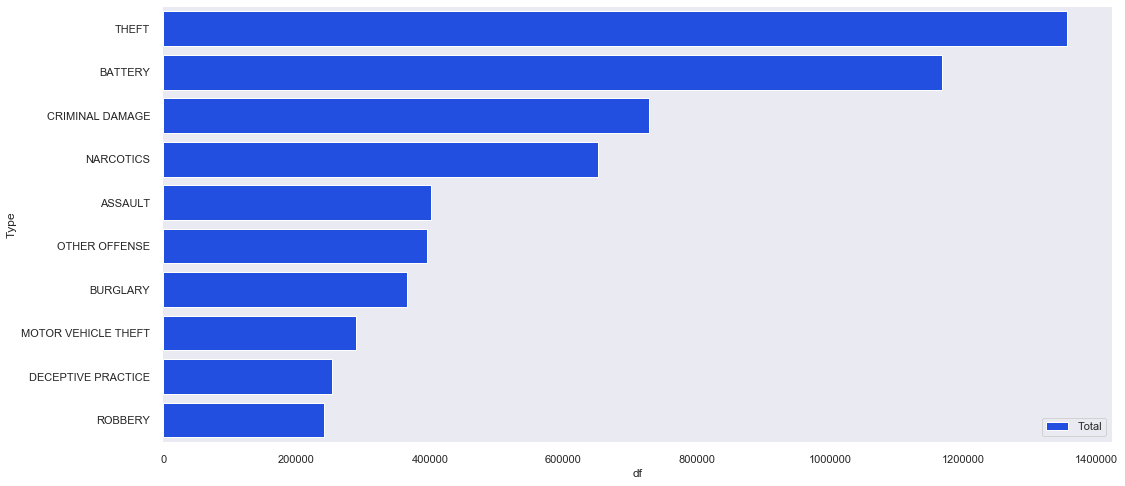

In [12]:
import seaborn as sns

sns.set(style="dark")

f, ax = plt.subplots(figsize=(17, 8))

sns.set_color_codes("bright")
sns.barplot(x="counts", y="Primary Type", data=chcgo_crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="df")
sns.despine(left=True, bottom=True)

plt.show()


## Different crimes over the years


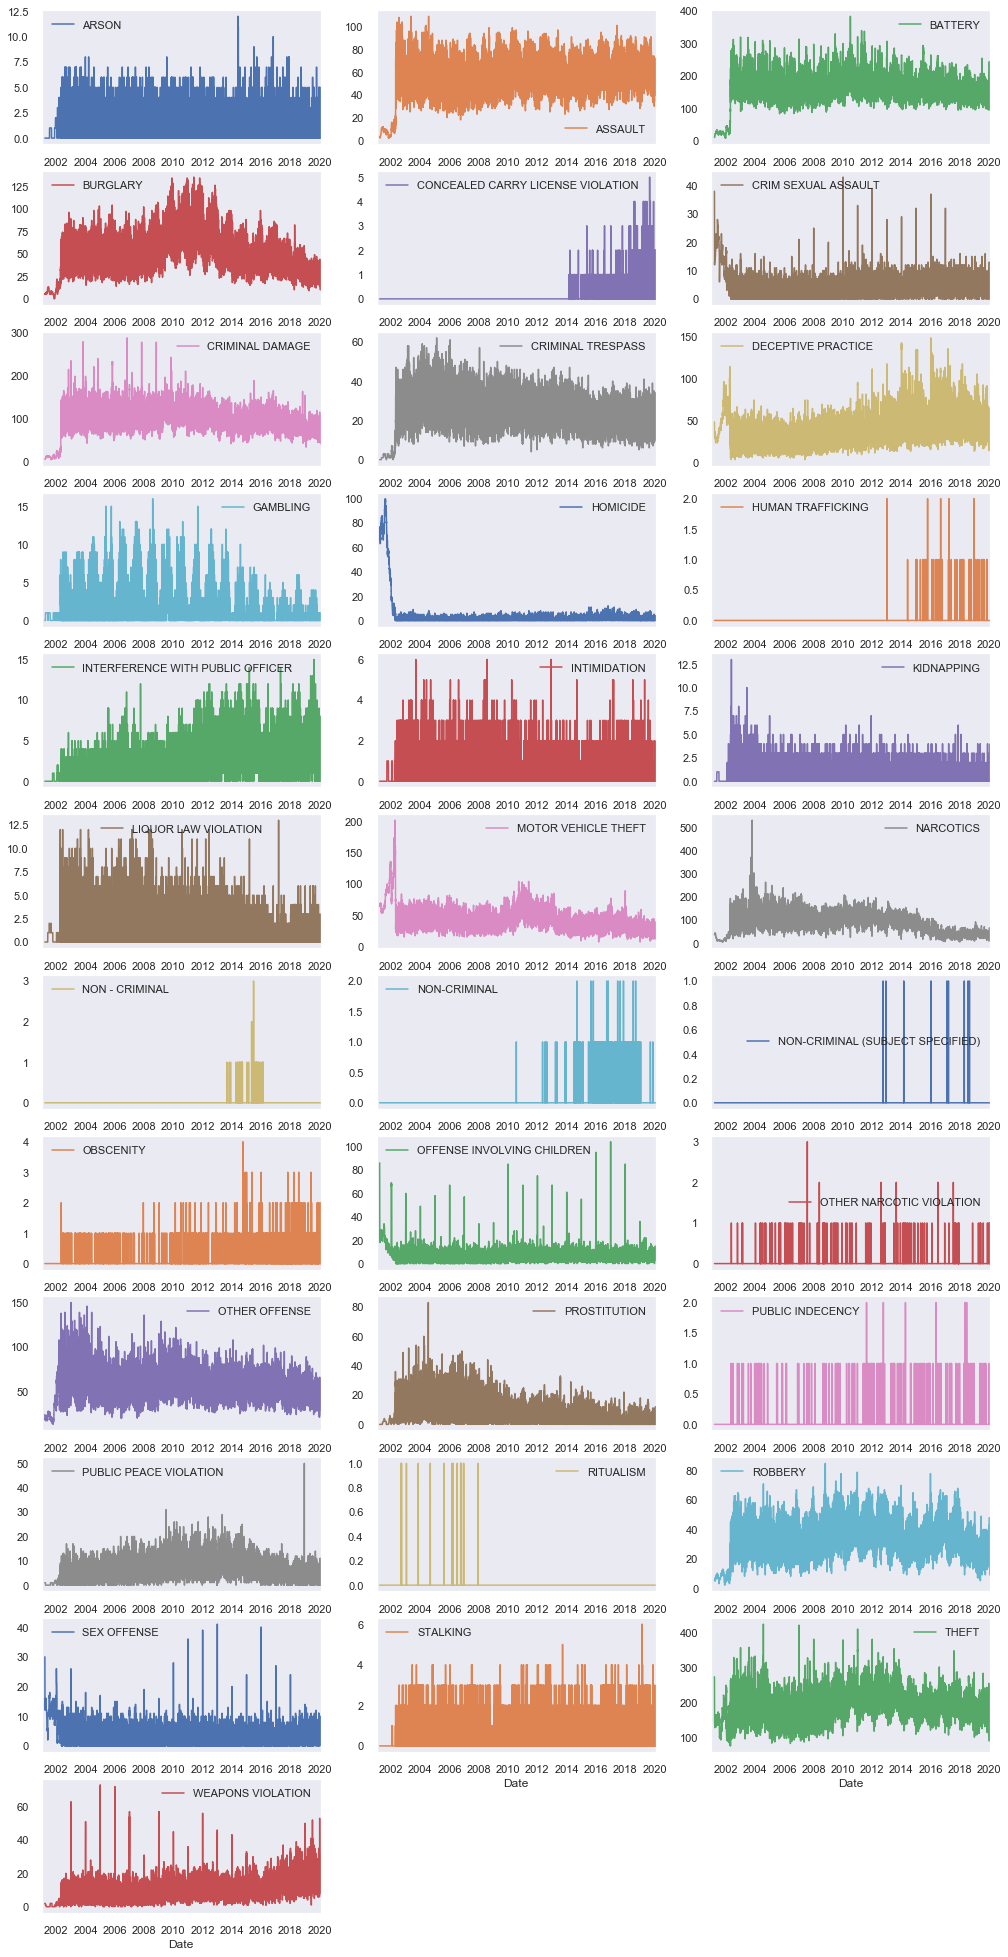

In [13]:
Crimes_Count=df.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=df.index,fill_value=0)
Crimes_Count.index=pd.DatetimeIndex(Crimes_Count.index)
plot=Crimes_Count.rolling(365).sum().plot(figsize=(17,35),subplots=True,layout=(-1,3),sharex=False,sharey=False)

## Which locations are these frequent crimes being committed to?

In [14]:
chcgo_crime_count_loc = pd.DataFrame(df[['Location Description']].groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index())

In [15]:
chcgo_crime_count_loc.shape

(180, 2)

In [16]:
chcgo_crime_count_loc.head()

,Location Description,counts
0,STREET,1638011
1,RESIDENCE,1059761
2,APARTMENT,696610
3,SIDEWALK,648001
4,OTHER,238681


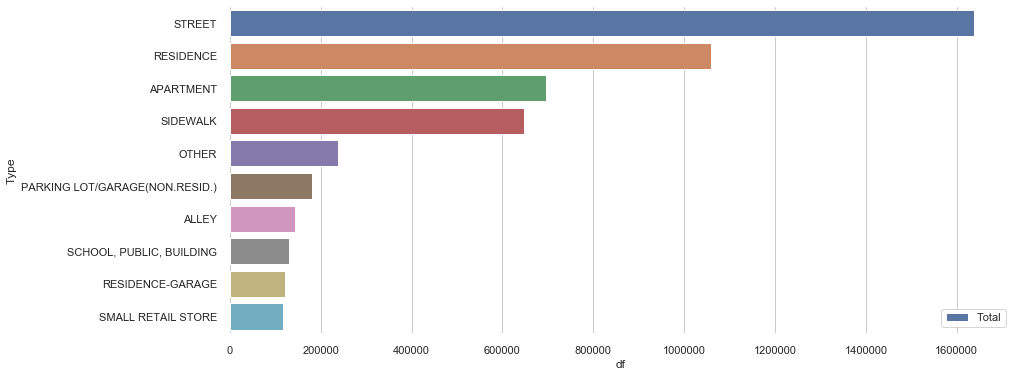

In [17]:
import seaborn as sns

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6))

sns.set_color_codes("deep")
sns.barplot(x="counts", y="Location Description", data=chcgo_crime_count_loc.iloc[:10, :],
            label="Total")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="df")
sns.despine(left=True, bottom=True)

plt.show()

## Sub types of the frequently commited crimes

In [18]:
df['Primary Type'].value_counts().head(5)

THEFT              1354882
BATTERY            1168334
CRIMINAL DAMAGE     728526
NARCOTICS           652170
ASSAULT             401680
Name: Primary Type, dtype: int64

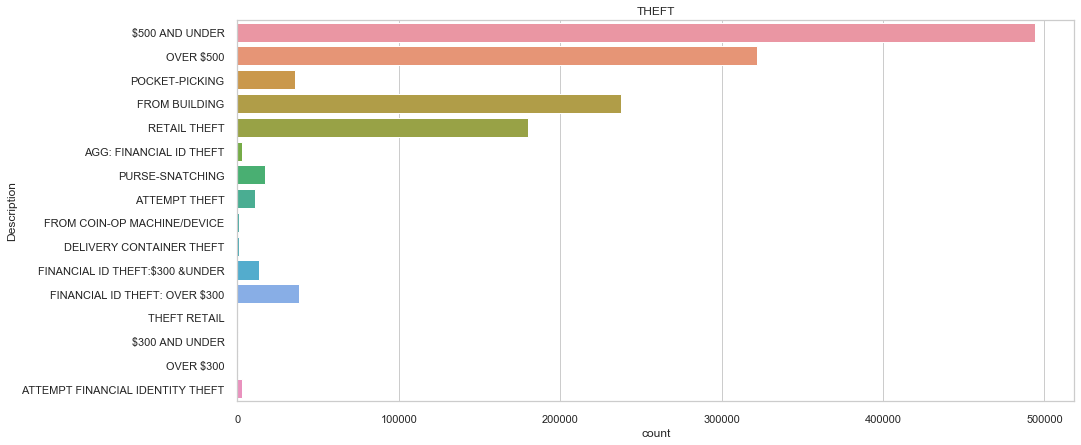

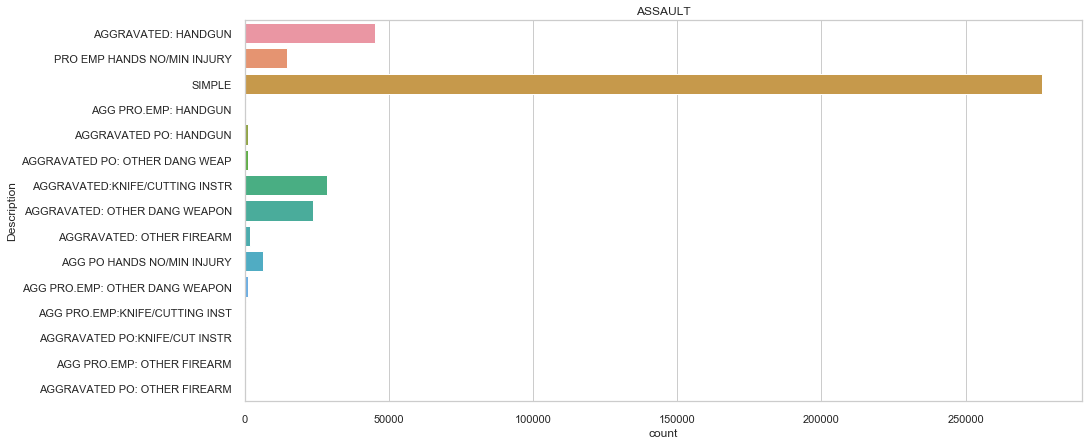

In [19]:
df_theft = df[df['Primary Type'] == 'THEFT']
plt.figure(figsize = (15, 7))
plt.title('THEFT')
sns.countplot(y = df_theft['Description'])

df_assault = df[df['Primary Type'] == 'ASSAULT']
plt.figure(figsize = (15, 7))
plt.title('ASSAULT')
sns.countplot(y = df_assault['Description'])

## Arrests Trends in different years

In [20]:
df_2012 = df.loc['2012']
df_2013 = df.loc['2013']
df_2014 = df.loc['2014']
df_2015 = df.loc['2015']
df_2016 = df.loc['2016']
df_2017 = df.loc['2017']
df_2017 = df.loc['2018']
df_2017 = df.loc['2019']
df_2017 = df.loc['2020']
yearly_arrests = df[df['Arrest'] == True]['Arrest']

In [21]:
print(yearly_arrests.head())

Date
2019-04-07 04:08:00    True
2019-04-20 20:50:00    True
2019-04-21 06:00:00    True
2019-05-20 13:00:00    True
2019-05-21 12:32:00    True
Name: Arrest, dtype: bool


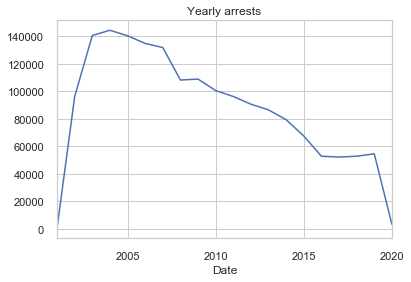

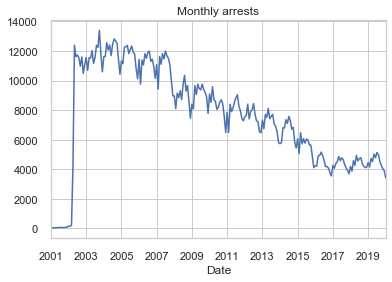

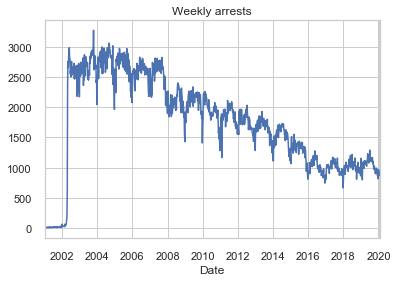

In [22]:
plt.subplot()

yearly_arrests.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

yearly_arrests.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

yearly_arrests.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

plt.show()
plt.show()

## No of Crimes done on each day in a week till now

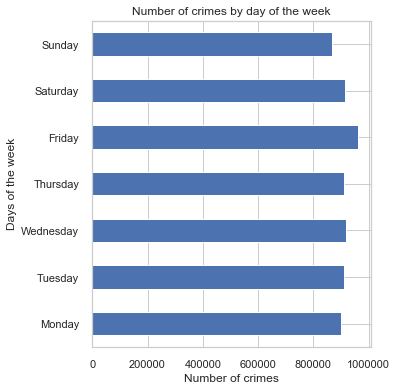

In [23]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh', figsize=(5, 6))
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

## Crimes based on district from 2001 to present

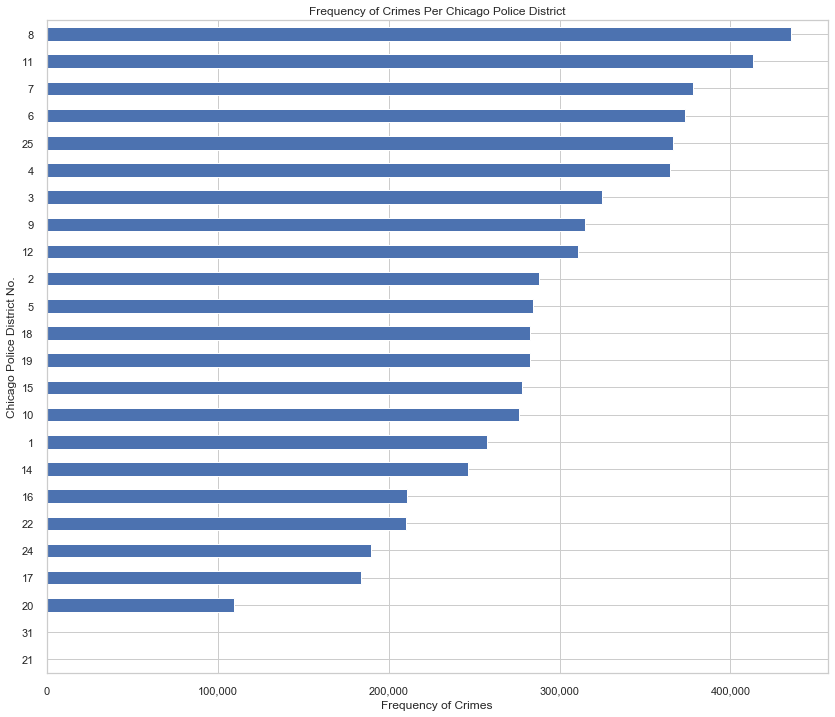

In [24]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Crime Mapping

In [25]:
c_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [26]:
locations = df.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(c_map)

In [27]:
c_map

## Data Pre-Processing beforing running models

In [28]:
df=df.drop_duplicates()

In [29]:
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6382677 entries, 2019-01-03 19:20:00 to 2019-05-26 02:11:00
Data columns (total 18 columns):
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(2), object(7)
memory usage: 840.0+ MB


In [30]:
df['Year'] = df.index.year
df['Month'] =df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df['Second'] = df.index.second 
df.reset_index(drop=True, inplace=True)

df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
0,0000X W RWY 27R,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1654,16.0,41.0,...,1943906.0,2019,42.002816,-87.906094,"(42.002816387, -87.90609433)",1,3,19,20,0
1,001XX N WELLS ST,0460,BATTERY,SIMPLE,STREET,False,False,122,1.0,42.0,...,1900866.0,2019,41.883369,-87.633860,"(41.88336939, -87.633860272)",3,16,17,58,0
2,008XX E 38TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,212,2.0,4.0,...,1879784.0,2019,41.825347,-87.606781,"(41.825346902, -87.606780575)",3,12,22,0,0
3,074XX N PAULINA ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,2422,24.0,49.0,...,1949311.0,2019,42.016542,-87.672499,"(42.016541612, -87.672499325)",3,14,18,42,0
4,008XX E 38TH PL,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,212,2.0,4.0,...,1879766.0,2019,41.825299,-87.606961,"(41.825298645, -87.6069609)",3,14,16,3,0


## Converting Categorical data into numerical form

In [31]:
# Converting Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 


In [32]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

less_freq_classes = all_classes.tail(13)
less_freq_classes

,Primary Type,Amt
10,HOMICIDE,9689
14,KIDNAPPING,5671
13,INTIMIDATION,3739
31,STALKING,3330
21,OBSCENITY,602
4,CONCEALED CARRY LICENSE VIOLATION,531
19,NON-CRIMINAL,162
26,PUBLIC INDECENCY,162
23,OTHER NARCOTIC VIOLATION,122
11,HUMAN TRAFFICKING,59


## Analysis on Target variable for making changes in the data

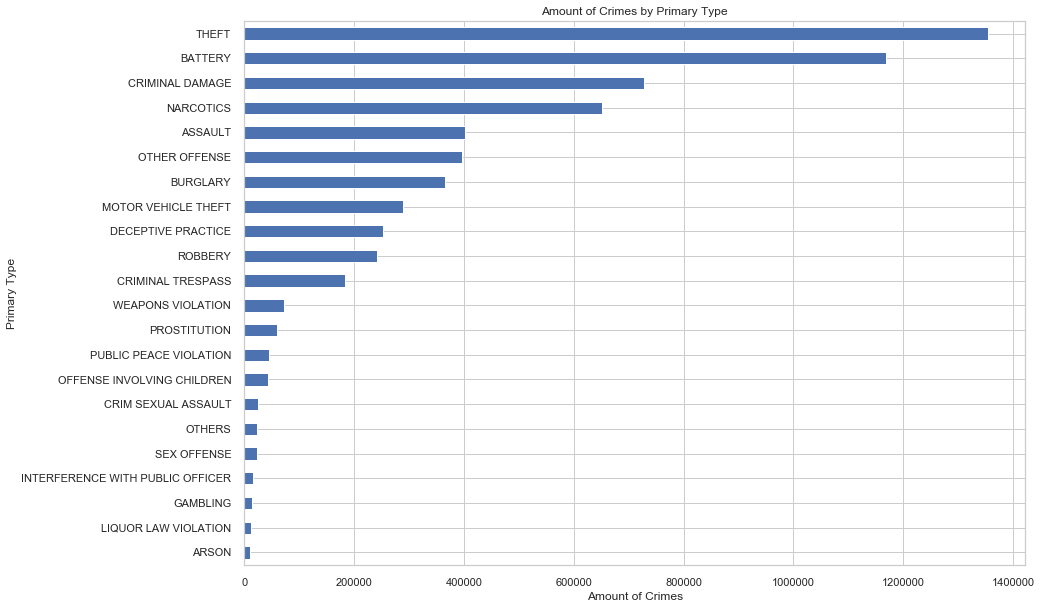

In [33]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(less_freq_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

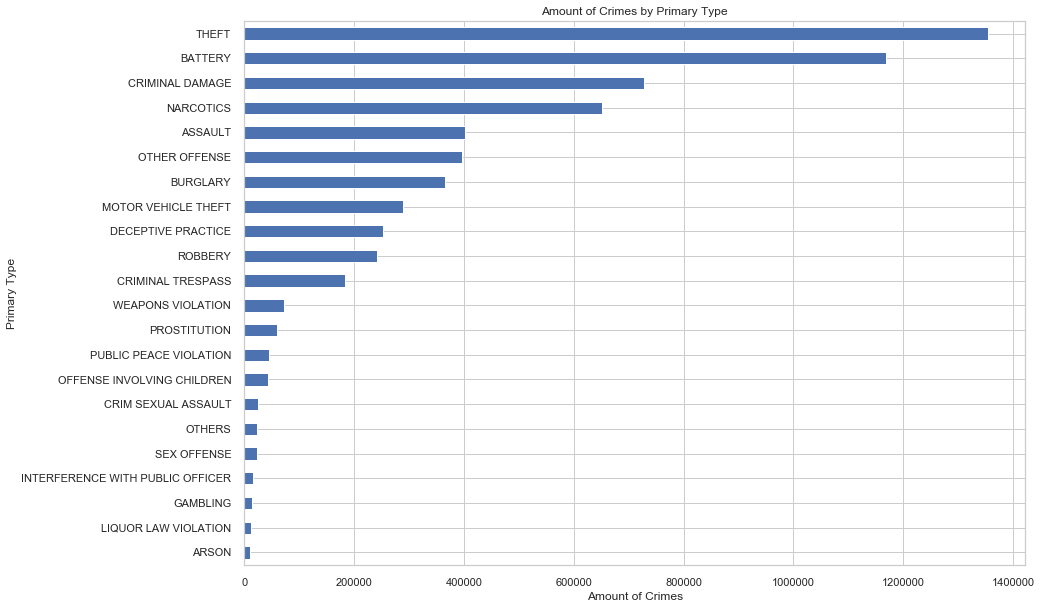

In [34]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [35]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


In [36]:
Classes = df['Primary Type'].unique()
Classes

array(['PUBLIC PEACE VIOLATION', 'BATTERY', 'THEFT', 'OTHER OFFENSE',
       'ASSAULT', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'OTHERS',
       'NARCOTICS', 'ROBBERY', 'CRIMINAL TRESPASS', 'SEX OFFENSE',
       'BURGLARY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
       'LIQUOR LAW VIOLATION', 'ARSON', 'GAMBLING'], dtype=object)

In [37]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

## Feature selection based on correlation

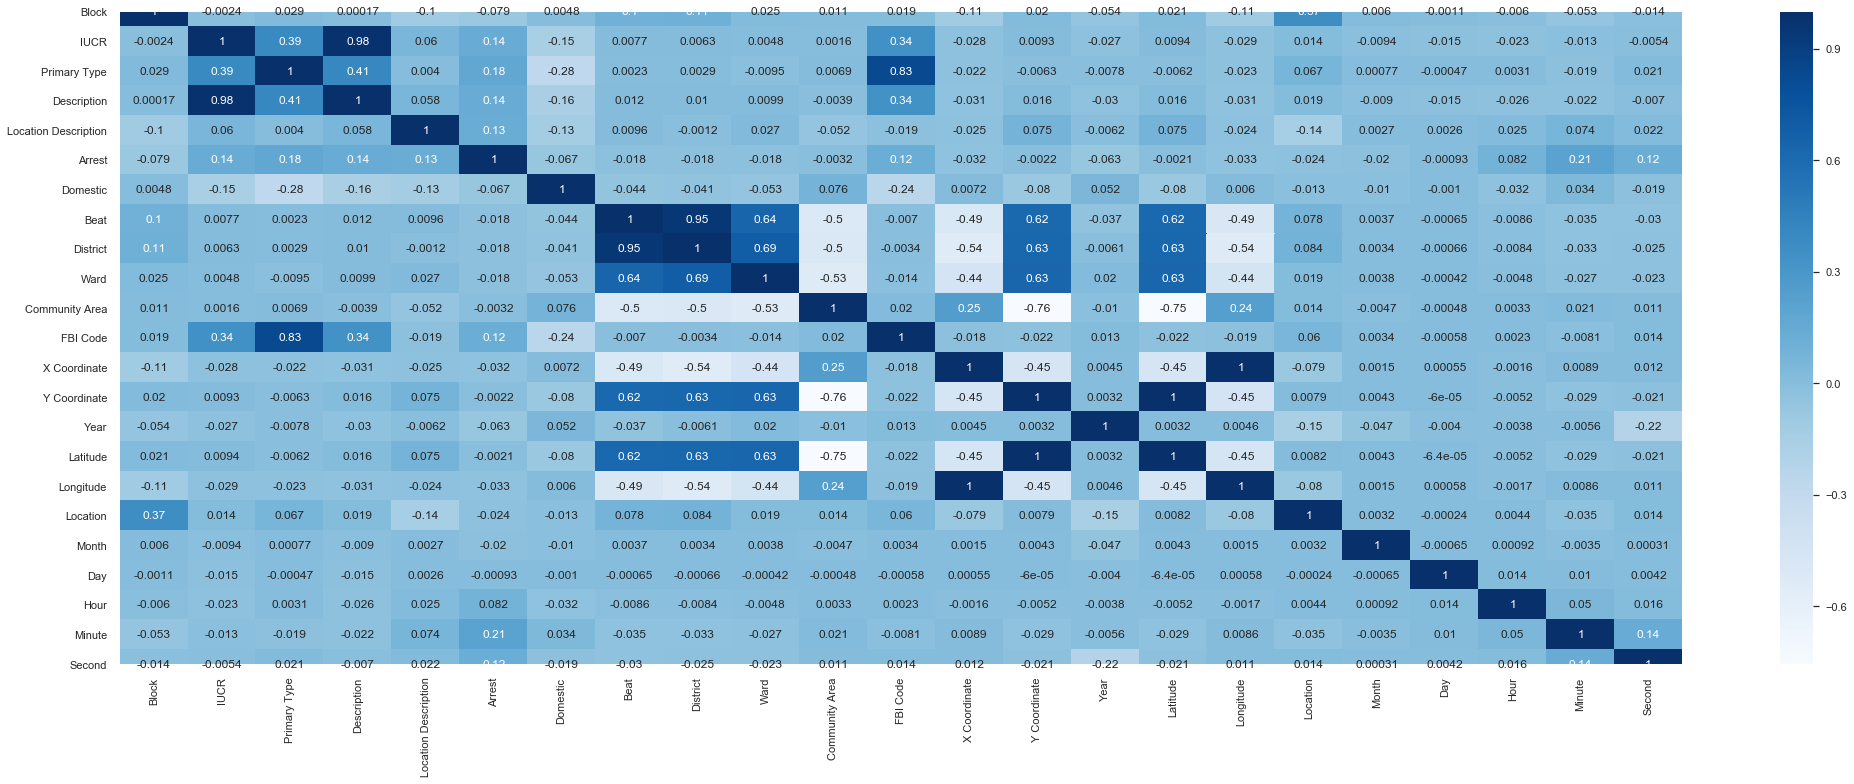

In [38]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(35,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [39]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.392172
Primary Type    1.000000
Description     0.411909
Domestic        0.281511
FBI Code        0.830075
Name: Primary Type, dtype: float64

In [40]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code","Location Description","Domestic"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code', 'Location Description', 'Domestic']


In [41]:
df =  df.sample(100000) # sampling the dataset as it takes long time to process

## Splitting the data

In [42]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code', 'Location Description', 'Domestic']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


## Fitting the data to Models
### I used three different models - 
### 1) RandomForestClassifier 
### 2) Multi-layer Perceptron classifier Neural Network
### 3) KNeighborsClassifier
### Finally I included all three models in a voting classifier for better results building voting ensemble model

In [43]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [44]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.99425
Recall      :  0.99425
Precision   :  0.9942939231822158
F1 Score    :  0.99425
Confusion Matrix: 
[[ 129    5    0    4    0    0    0    1    0    0    3    0    2    0
     0    0    0    0    0    0    0    0]
 [   0 3560    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0 4205    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1275    0    0    0    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0 1249    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    7   77    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 2252    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   2    0    0    2    0   

================= Classification Report =================

                                  precision    recall  f1-score   support

          PUBLIC PEACE VIOLATION       0.92      0.90      0.91       144
                         BATTERY       1.00      1.00      1.00      3561
                           THEFT       1.00      1.00      1.00      4205
                   OTHER OFFENSE       0.97      1.00      0.98      1276
                         ASSAULT       0.99      1.00      0.99      1249
             CRIM SEXUAL ASSAULT       0.99      0.92      0.95        84
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2252
      OFFENSE INVOLVING CHILDREN       0.92      0.87      0.89       127
                    PROSTITUTION       0.97      1.00      0.98       197
                          OTHERS       1.00      0.51      0.67        89
                       NARCOTICS       1.00      0.99      1.00      2026
                         ROBBERY       1.00      1.0

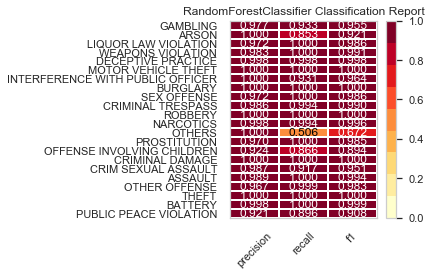

In [45]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [46]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features]) 

In [47]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.983
Recall      :  0.983
Precision   :  0.9826847065568325
F1 Score    :  0.983
Confusion Matrix: 
[[ 106    0    0   21    0    0    0    1    0    0    3    0    9    0
     2    0    2    0    0    0    0    0]
 [   0 3538    0    0    1    0    0    0    0    1   21    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0 4205    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1242    1    0    0    4    2    0   21    0    5    1
     0    0    0    0    0    0    0    0]
 [   0    1    4    0 1244    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   78    1    5    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 2250    0    2    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    3    0    2   

================= Classification Report =================

                                  precision    recall  f1-score   support

          PUBLIC PEACE VIOLATION       0.95      0.74      0.83       144
                         BATTERY       1.00      0.99      1.00      3561
                           THEFT       1.00      1.00      1.00      4205
                   OTHER OFFENSE       0.95      0.97      0.96      1276
                         ASSAULT       1.00      1.00      1.00      1249
             CRIM SEXUAL ASSAULT       0.97      0.93      0.95        84
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2252
      OFFENSE INVOLVING CHILDREN       0.78      0.84      0.81       127
                    PROSTITUTION       0.98      0.99      0.99       197
                          OTHERS       0.73      0.39      0.51        89
                       NARCOTICS       0.97      0.98      0.98      2026
                         ROBBERY       0.99      0.9

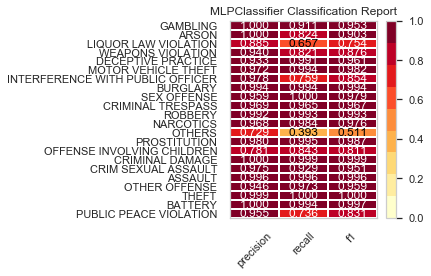

In [48]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [49]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [50]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.9923
Recall      :  0.9923
Precision   :  0.9922766920732643
F1 Score    :  0.9923
Confusion Matrix: 
[[ 135    2    0    5    0    0    0    0    0    0    0    0    0    0
     0    0    2    0    0    0    0    0]
 [   0 3540    6    1    0    0    0    0    1    0    7    5    1    0
     0    0    0    0    0    0    0    0]
 [   1    0 4198    5    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1    6    3 1261    0    0    0    0    0    0    0    2    2    0
     1    0    0    0    0    0    0    0]
 [   0    2    0    5 1238    2    0    0    0    0    1    1    0    0
     0    0    0    0    0    0    0    0]
 [   0    2    0    1    1   80    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0 2251    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    2    0    1    0

================= Classification Report =================

                                  precision    recall  f1-score   support

          PUBLIC PEACE VIOLATION       0.98      0.94      0.96       144
                         BATTERY       0.99      0.99      0.99      3561
                           THEFT       1.00      1.00      1.00      4205
                   OTHER OFFENSE       0.98      0.99      0.98      1276
                         ASSAULT       1.00      0.99      0.99      1249
             CRIM SEXUAL ASSAULT       0.96      0.95      0.96        84
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2252
      OFFENSE INVOLVING CHILDREN       0.98      0.95      0.96       127
                    PROSTITUTION       0.99      0.99      0.99       197
                          OTHERS       0.93      0.80      0.86        89
                       NARCOTICS       0.99      0.99      0.99      2026
                         ROBBERY       0.98      0.9

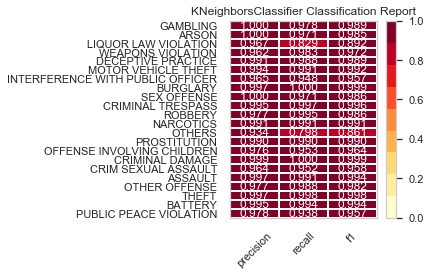

In [51]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [52]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y[Features])

In [53]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  0.99475
Recall      :  0.99475
Precision   :  0.9946696645463522
F1 Score    :  0.99475
Confusion Matrix: 
[[ 134    2    0    5    0    0    0    1    0    0    2    0    0    0
     0    0    0    0    0    0    0    0]
 [   0 3558    0    0    0    0    0    0    0    0    3    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0 4205    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1    3    1 1270    0    0    0    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0]
 [   0    0    2    0 1247    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   83    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 2252    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    1    0    3

================= Classification Report =================

                                  precision    recall  f1-score   support

          PUBLIC PEACE VIOLATION       0.93      0.93      0.93       144
                         BATTERY       1.00      1.00      1.00      3561
                           THEFT       1.00      1.00      1.00      4205
                   OTHER OFFENSE       0.97      1.00      0.98      1276
                         ASSAULT       1.00      1.00      1.00      1249
             CRIM SEXUAL ASSAULT       1.00      0.99      0.99        84
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2252
      OFFENSE INVOLVING CHILDREN       0.92      0.94      0.93       127
                    PROSTITUTION       0.99      1.00      1.00       197
                          OTHERS       0.90      0.61      0.72        89
                       NARCOTICS       1.00      0.99      0.99      2026
                         ROBBERY       1.00      1.0

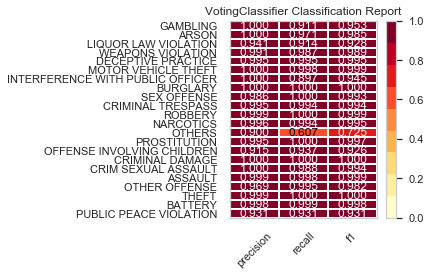

In [54]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data